# TASK A1 Result

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [3]:
from modules.helper import *
info = {}
info['projectPath'] = os.getcwd()
info['targetPath'] = "SOO_targets/DP1000_room_Swift_NDBR50_curve2"
info['resultPath'] = "SOO_results/DP1000_room_Swift_NDBR50_curve2"

In [4]:
# Add column force,N to the target curve
# Create new dataframe
df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
targetCurve = pd.read_csv(f"{info['targetPath']}/FD_Curve.csv")
df['displacement/mm'] = targetCurve['displacement/mm']
df['force/kN'] = targetCurve['force/N'] * 1e-3
df['force/N'] = targetCurve['force/N']
df.to_csv(f"{info['targetPath']}/FD_Curve.csv",index=False)

# Initial guess simulations

[0.0, 0.0300013, 0.0600055, 0.0899964, 0.119974, 0.14993, 0.179882, 0.209834, 0.239786, 0.269773, 0.299776, 0.32978, 0.359783, 0.389786, 0.41979, 0.449789, 0.479764, 0.509665, 0.539566, 0.569467, 0.599481, 0.629625, 0.659766, 0.689906, 0.720051, 0.750191, 0.780331, 0.810476, 0.840617, 0.870757, 0.900902, 0.931042, 0.961187, 0.991327, 1.02147, 1.05161, 1.08175, 1.11148, 1.14121, 1.17094, 1.20067, 1.2304, 1.26013, 1.28986, 1.31959, 1.34931, 1.37904, 1.40877, 1.4385, 1.46823, 1.49823, 1.52853, 1.55882, 1.58911, 1.61941, 1.6497, 1.68, 1.71029, 1.74058, 1.77088, 1.80117, 1.83146, 1.86176, 1.89205, 1.92234, 1.95263, 1.98293, 2.01321, 2.04308, 2.07295, 2.10281, 2.1329, 2.16291, 2.19289, 2.2228, 2.25296, 2.28268, 2.313, 2.34291, 2.3729, 2.40361, 2.43348, 2.46269, 2.49333, 2.52359, 2.55344, 2.58253, 2.61314, 2.64386, 2.67346, 2.70281, 2.73294, 2.76352, 2.79339, 2.82223, 2.85212, 2.88334, 2.91374, 2.944, 2.9728, 3.0016]


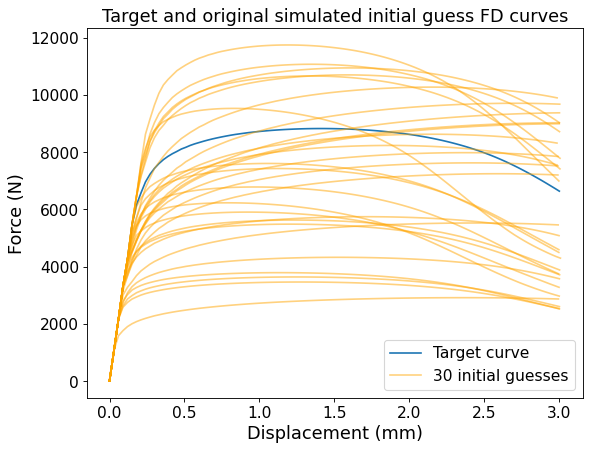

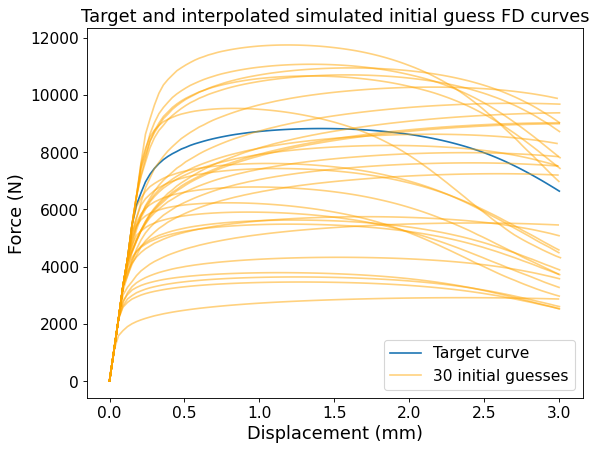

In [25]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 
#print(max(expDisplacement))
targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

initial_original_FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()
initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)
print(list(initial_interpolated_FD_Curves.values())[0]['displacement'])

fontsize = 14
# print(maxDisp)
# Plotting all FD curves

# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Target curve')
for param in initial_original_FD_Curves:
    plt.plot(initial_original_FD_Curves[param]['displacement'], initial_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
numberOfInitialSims = len(initial_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfInitialSims} initial guesses')
plt.title('Target and original simulated initial guess FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)


figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Target curve')
for param in initial_interpolated_FD_Curves:
    plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
numberOfInitialSims = len(initial_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfInitialSims} initial guesses')
plt.title('Target and interpolated simulated initial guess FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

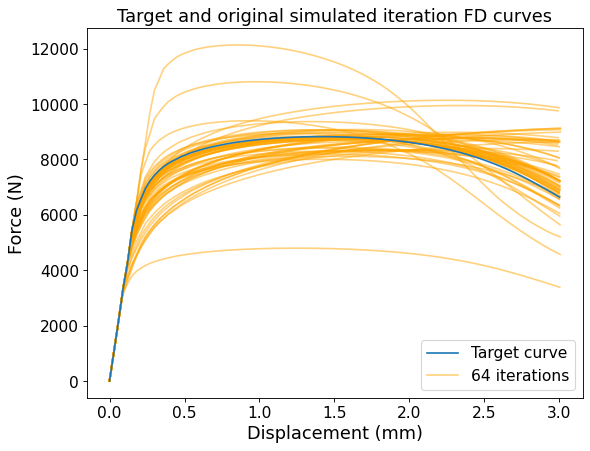

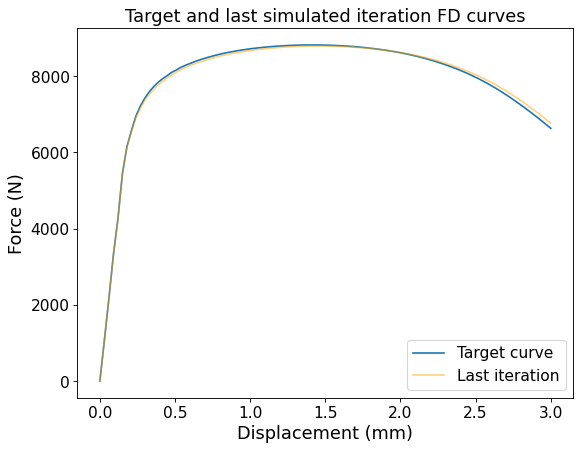

In [28]:
fontsize = 14

# Do the same like cell above but for iteration
# Plotting all FD curves

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()
figure(figsize=(8, 6), dpi=80)

for param in iteration_original_FD_Curves:
    plt.plot(iteration_original_FD_Curves[param]['displacement'], iteration_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot(expDisplacement, expForce, label='Target curve')

numberOfIterations = len(iteration_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfIterations} iterations')
plt.title('Target and original simulated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

# Do the same like cell above but for iteration
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)

iter = -1

last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

plt.plot(expDisplacement, expForce, label='Target curve')
plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='orange', alpha=0.5)
plt.plot([],[], color='orange', alpha=0.5, label='Last iteration')
plt.title('Target and last simulated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

Iterations that satisfy the stop criterion: [61, 62, 63, 64]
[61, 62, 63, 64]


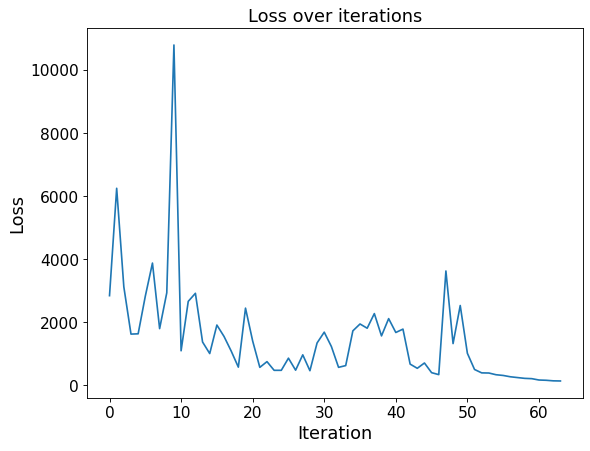

In [55]:
# Plotting error over iterations
from modules.stoploss import *

deviationPercent = 3
iteration_errors = []
stop_check = []

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

iter = 1
for param in iteration_original_FD_Curves:
    iteration_errors.append(lossFD(iteration_interpolated_FD_Curves[param]['displacement'], iteration_interpolated_FD_Curves[param]['force'], expForce))
    if stopFD(expForce, iteration_interpolated_FD_Curves[param]['force'], deviationPercent):
        stop_check.append(iter)
    iter += 1

if np.any(len(stop_check)) == 0:
    print(f"No iterations satisfy the {deviationPercent}% deviation stop criterion")
else:
    print(f"Iterations that satisfy the stop criterion: {stop_check}")

figure(figsize=(8, 6), dpi=80)

fontsize=14
plt.plot(iteration_errors, label='Error')
plt.title('Loss over iterations', fontsize=fontsize+2)
#plt.xlim([-1, len(iteration_errors)])
plt.xlabel('Iteration', fontsize=fontsize+2)
plt.ylabel('Loss', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
print(stop_check)


# Create animations

In [49]:
import imageio
fontsize = 12

# Do the same like cell above but for iteration
# Plotting all FD curves

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()

numberOfIterations = len(iteration_original_FD_Curves)

for iter in range(numberOfIterations):
    figure(figsize=(8, 6), dpi=80)

    last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
    last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

    plt.plot(expDisplacement, expForce, label='Target curve')
    plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='orange', alpha=0.5)
    plt.plot([],[], color='orange', alpha=0.5, label=f'Iteration {iter + 1}')
    plt.title('Target and last simulated iteration FD curves', fontsize=fontsize+2)
    plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
    plt.ylabel('Force (N)', fontsize=fontsize+2)
    plt.ylim([-500, 12000])
    plt.xlim([-0.1, 3.5])
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)

    plt.savefig(f'notebooks/iteration_evolution/A1_results/iter_{iter+1}.png', 
        transparent = False,  
        facecolor = 'white'
        )
    plt.close()

frames = []
for iter in range(numberOfIterations):
    image = imageio.v2.imread(f'notebooks/iteration_evolution/A1_results/iter_{iter+1}.png')
    frames.append(image)

imageio.mimsave(f'notebooks/iteration_evolution/A1_results.gif', 
                frames, 
                duration = 300,  # ms per image
                loop = 0
                )